In [1]:
grid = [ list(map(int, line)) for line in open("puzzle15.txt").read().split("\n") ]
height = len(grid); width = len(grid[0])
startingPosition = (0, 0)
targetPosition = (height - 1, width - 1)


In [26]:
from math import inf

def dijkstra(graph : list[list[int]], source : tuple[int, int]):

    def findMindDistNode(queue : set[tuple[int,int]], distances : dict[tuple[int, int]:float]):
        minDist = sorted([k for k in distances if k in queue], key=lambda x: (distances[x] + graph[x[0]][x[1]]))[0]
        queue.remove(minDist)
        return minDist
    def length(nodeFrom : tuple[int, int], nodeTo : tuple[int, int]):
        return graph[nodeTo[0]][nodeTo[1]]

    dist = {}
    prev = {}
    Q = set()

    for row in range(len(graph)):
        for col in range(len(graph[0])):
            dist[(row, col)] = inf
            prev[(row, col)] = None
            Q.add((row, col))
            
    dist[source] = 0

    while len(Q) > 0:
        print(len(Q))
        u = findMindDistNode(Q,dist)
        neighbours = [(u[0] + dr, u[1] + dc) for dr in range(-1, 2) for dc in range(-1, 2) if (0 <= u[0] + dr < len(graph)) and (0 <= u[1] + dc < len(graph[0])) and (dc + dr != 0 and abs(dc + dr) == 1)]
        for v in neighbours:
            alt = dist[u] + length(u, v)
            if alt < dist[v]:
                dist[v] = alt
                prev[v] = u
    return dist, prev



In [27]:
distances, previous = dijkstra(grid, (0,0))

10000
9999
9998
9997
9996
9995
9994
9993
9992
9991
9990
9989
9988
9987
9986
9985
9984
9983
9982
9981
9980
9979
9978
9977
9976
9975
9974
9973
9972
9971
9970
9969
9968
9967
9966
9965
9964
9963
9962
9961
9960
9959
9958
9957
9956
9955
9954
9953
9952
9951
9950
9949
9948
9947
9946
9945
9944
9943
9942
9941
9940
9939
9938
9937
9936
9935
9934
9933
9932
9931
9930
9929
9928
9927
9926
9925
9924
9923
9922
9921
9920
9919
9918
9917
9916
9915
9914
9913
9912
9911
9910
9909
9908
9907
9906
9905
9904
9903
9902
9901
9900
9899
9898
9897
9896
9895
9894
9893
9892
9891
9890
9889
9888
9887
9886
9885
9884
9883
9882
9881
9880
9879
9878
9877
9876
9875
9874
9873
9872
9871
9870
9869
9868
9867
9866
9865
9864
9863
9862
9861
9860
9859
9858
9857
9856
9855
9854
9853
9852
9851
9850
9849
9848
9847
9846
9845
9844
9843
9842
9841
9840
9839
9838
9837
9836
9835
9834
9833
9832
9831
9830
9829
9828
9827
9826
9825
9824
9823
9822
9821
9820
9819
9818
9817
9816
9815
9814
9813
9812
9811
9810
9809
9808
9807
9806
9805
9804
9803
9802
9801

In [28]:
path = []
node = targetPosition
steps = 0
while node != startingPosition and steps < 10000:
    path.append(node)
    node = previous[node]
    steps += 1
path.append(startingPosition)
path

[(99, 99),
 (98, 99),
 (98, 98),
 (97, 98),
 (97, 97),
 (96, 97),
 (96, 96),
 (95, 96),
 (94, 96),
 (94, 95),
 (94, 94),
 (94, 93),
 (94, 92),
 (94, 91),
 (93, 91),
 (93, 90),
 (92, 90),
 (92, 89),
 (92, 88),
 (91, 88),
 (91, 87),
 (91, 86),
 (90, 86),
 (89, 86),
 (89, 85),
 (88, 85),
 (87, 85),
 (87, 84),
 (87, 83),
 (87, 82),
 (86, 82),
 (85, 82),
 (85, 81),
 (85, 80),
 (84, 80),
 (84, 79),
 (84, 78),
 (83, 78),
 (83, 77),
 (82, 77),
 (82, 76),
 (82, 75),
 (81, 75),
 (81, 74),
 (81, 73),
 (80, 73),
 (80, 72),
 (80, 71),
 (80, 70),
 (80, 69),
 (81, 69),
 (81, 68),
 (81, 67),
 (81, 66),
 (81, 65),
 (81, 64),
 (81, 63),
 (81, 62),
 (81, 61),
 (80, 61),
 (80, 60),
 (79, 60),
 (79, 59),
 (79, 58),
 (78, 58),
 (77, 58),
 (77, 57),
 (77, 56),
 (77, 55),
 (77, 54),
 (76, 54),
 (75, 54),
 (74, 54),
 (73, 54),
 (73, 53),
 (73, 52),
 (72, 52),
 (72, 51),
 (71, 51),
 (70, 51),
 (70, 50),
 (70, 49),
 (70, 48),
 (69, 48),
 (69, 47),
 (69, 46),
 (69, 45),
 (69, 44),
 (68, 44),
 (68, 43),
 (68, 42),

In [24]:
from PIL import Image
grayscale = [(int(255 - (x / 10) * 255),int(255 - (x / 10) * 255),int(255 - (x / 10) * 255), 255) for x in range(9)]
def drawGrid(grid : list[list[int]], path : list[tuple[int, int]] = None) -> Image:
    gridImage = Image.new("RGBA", (len(grid[0]), len(grid)), (0,0,0,0))
    p = [grayscale[grid[row][col] - 1] for row in range(len(grid)) for col in range(len(grid[0]))]
    gridImage.putdata(p)
    if path != None:
        pathImage = Image.new("RGBA", gridImage.size, (0,0,0,0))
        p = []
        for row in range(len(grid)):
            for col in range(len(grid[0])):
                if (row, col) in path:
                    p.append((255,0,0,255))
                else:
                    p.append((0,0,0,0))
        pathImage.putdata(p)
        gridImage = Image.alpha_composite(gridImage, pathImage)


    return gridImage.resize((gridImage.width * 4, gridImage.height * 4), Image.NEAREST)


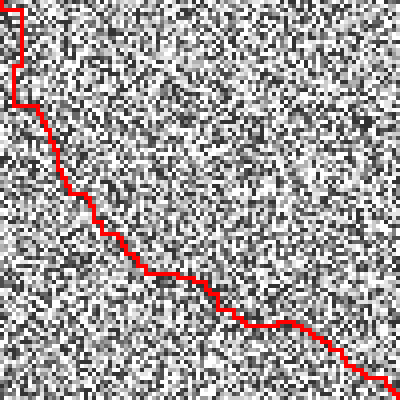

In [ ]:
img = drawGrid(grid, path)
img.save("day15part1path.png")
img

In [30]:
sum([grid[x[0]][x[1]] for x in path]) - grid[0][0]

456

In [33]:
import numpy as np
        

In [45]:
originalGrid = np.array(grid)
largerGrid = None
for i in range(5):
    largerRow = None
    for j in range(5):
        increment = i + j
        newTile = np.where((originalGrid + increment) < 10 , originalGrid + increment, (originalGrid + increment) - 9)
        if largerRow is None: largerRow = newTile
        else: largerRow = np.concatenate((largerRow, newTile), axis = 1)
    if largerGrid is None: largerGrid = largerRow
    else: largerGrid = np.concatenate((largerGrid, largerRow), axis = 0)
largerGrid

array([[5, 9, 6, ..., 1, 2, 3],
       [5, 5, 7, ..., 8, 8, 5],
       [3, 1, 7, ..., 8, 7, 5],
       ...,
       [2, 9, 5, ..., 1, 9, 5],
       [3, 1, 2, ..., 4, 2, 1],
       [3, 5, 6, ..., 4, 1, 2]])

In [48]:
newMap = largerGrid.tolist()


(500, 500)

In [49]:
distancesp2, previousp2 = dijkstra(newMap, (0,0))

250000
249999
249998
249997
249996
249995
249994
249993
249992
249991
249990
249989
249988
249987
249986
249985
249984
249983
249982
249981
249980
249979
249978
249977
249976
249975
249974
249973
249972
249971
249970
249969
249968
249967
249966
249965
249964
249963
249962
249961
249960
249959
249958
249957
249956
249955
249954
249953
249952
249951
249950
249949
249948
249947
249946
249945
249944
249943
249942
249941
249940
249939
249938
249937
249936
249935
249934
249933
249932
249931
249930
249929
249928
249927
249926
249925
249924
249923
249922
249921
249920
249919
249918
249917
249916
249915
249914
249913
249912
249911
249910
249909
249908
249907
249906
249905
249904
249903
249902
249901
249900
249899
249898
249897
249896
249895
249894
249893
249892
249891
249890
249889
249888
249887
249886
249885
249884
249883
249882
249881
249880
249879
249878
249877
249876
249875
249874
249873
249872
249871
249870
249869
249868
249867
249866
249865
249864
249863
249862
249861
249860
249859
249858

KeyboardInterrupt: 

In [ ]:
pathp2 = []
node = targetPosition
steps = 0
while node != startingPosition and steps < 10000:
    pathp2.append(node)
    node = previous[node]
    steps += 1
pathp2.append(startingPosition)

In [ ]:
img = drawGrid(newMap, pathp2)
img.save("day15part2path.png")
img

In [ ]:
sum([newMap[x[0]][x[1]] for x in pathp2]) - newMap[0][0]